<img width="600" height="200" src="../../assets/redes.png">

# **Read TFRecords from Google Cloud Store**
## Purpose
The purpose of this notebook is to read TFRecords from files stored in Google Cloud Store.

## Setup
### Library import

**Setup software libraries**

In [1]:
import sys
sys.path.append("vizzDL/")

import json
import tensorflow as tf
import matplotlib.pyplot as plt

from vizzDL import datasets
from vizzDL.utils.util import list_record_features, denormalize_01, denormalize_m11

## **Read TFRecords files from GCS**
**Create `TFRecords` object**

In [2]:
TFRecord = datasets.read_TFRecords(folder_path = '../../datasets/processed/Models/', dataset_name = 'L8_S2_SR_x3',\
                                   normalize_rgb = True, norm_range = [[0,1], [-1,1]], batch_size=16, shuffle_size=2000, scaling_factor=3)

**Read example dataset**

In [3]:
dataset = TFRecord.get_training_dataset()
dataset

<RepeatDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 192, 192, 3), dtype=tf.float32, name=None))>

**Get number of records**

In [5]:
nRecords = []

for n, glob in enumerate([TFRecord.params.get('data_dir') + '/' + base_name + '*' for base_name in TFRecord.params.get('base_names')]):
    glob = tf.compat.v1.io.gfile.glob(glob)
    
    Records = 0
    for record in tf.data.TFRecordDataset(glob, compression_type='GZIP'):
        example = tf.train.Example()
        example.ParseFromString(record.numpy())
        Records += 1
        
    nRecords.append(Records)
    
print('Number of training records:', nRecords[0])
print('Number of validation records:', nRecords[1])
print('Number of test records:', nRecords[2])

Number of training records: 1000
Number of validation records: 200
Number of test records: 200


In [6]:
for record in tf.data.TFRecordDataset(glob, compression_type='GZIP').take(1):
    example = tf.train.Example()
    example.ParseFromString(record.numpy())

bands = list(dict(example.features.feature).keys())
print('Bands:', bands)

Bands: ['L8_B', 'L8_R', 'S2_B', 'L8_G', 'S2_G', 'S2_R']


**Identify features in the TFRecord.**

In [ ]:
glob = TFRecord.params.get('data_dir') + '/' + TFRecord.params.get('base_names')[0] + '*'
features = list_record_features(glob)
print(*features.items(), sep='\n')

**Read example record**

In [4]:
iterator = iter(dataset)
image, label = iterator.get_next()
image = image.numpy()
label = label.numpy()
print("Input shape:", image.shape)
print("Output shape:", label.shape)

Input shape: (16, 64, 64, 3)
Output shape: (16, 192, 192, 3)


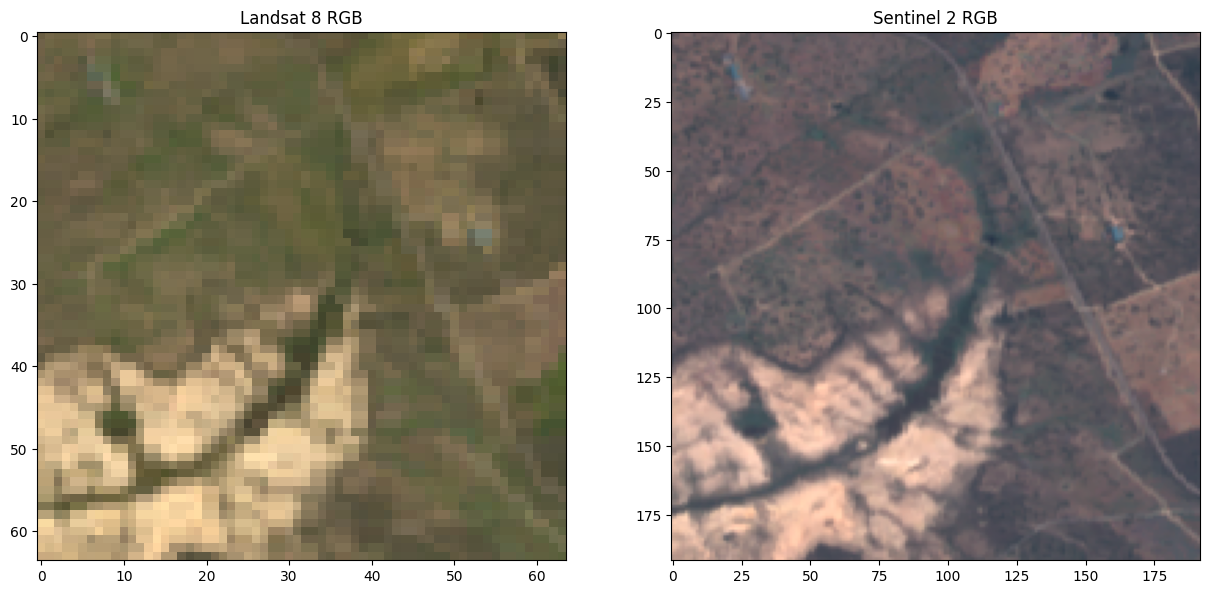

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

ax[0].imshow(denormalize_01(image[0,:,:,:3]))
ax[0].set_title('Landsat 8 RGB')

ax[1].imshow(denormalize_m11(label[0,:,:,:3]))
ax[1].set_title('Sentinel 2 RGB')

plt.show()